## Day Objectives:

- Multi Linear Regression

**Multi Linear Regression**

    	Applying Linear regression with multiple features we call it as multi linear regression

**Applying Linear Regression for Boston house price dataset for predictions of house prices**

**1. Get Data**

In [3]:
import pandas as pd
from sklearn.datasets import load_boston

In [7]:
boston = load_boston()
#boston

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston['filename']

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [10]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
data = pd.DataFrame(boston['data'])
data.columns = boston['feature_names']
data['target'] = boston['target']

In [16]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
data.shape

(506, 14)

**2.Pre - Processing**

In [21]:
# is there any missing values

data.isna().sum()
# data.isnull().sum()
# data.isnull().sum().sum()  # this will give you the total coutn of null values in our data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

 I am randomly taking RM column as feature and check the preformnace of the model

In [22]:
x = data[['RM']]
y = data['target']

In [23]:
import matplotlib.pyplot as plt

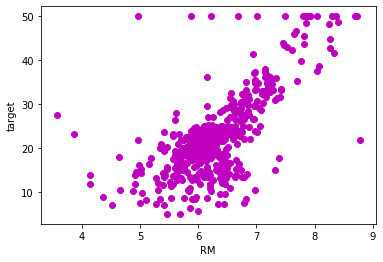

In [24]:
plt.figure()

plt.scatter(x,y,c = 'm')

plt.xlabel('RM')
plt.ylabel('target')

plt.show()

**3. Train the model**


split the data for training data and testing


here we are considering 70% data for training and 30% for testing

* for training 354 rows and for testing 152 rows

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
# default separation is train = 75% test = 25%

In [28]:
x_train.shape

(379, 1)

In [29]:
x_test.shape

(127, 1)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Create object for algorithm
model = LinearRegression()

In [33]:
# Train the model with training data
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.score(x_train,y_train)*100

52.540761394990156

In [35]:
model.score(x_test,y_test)*100

28.775803219022254

### How to improve the model preformance or score

1. By giving mode data for training
2. By taking different features
3. By Combining different features
4. By parameter Tuning

**We need to identify best features which effects the target**

data.corr()  It gives the co-relation between columns

If the corr() value near to 1 then columns are +ve linearity.

    ex:**if temp increases then sales of cooldrinks increases.**

If the corr() value near to -1 then columns are -ve linearity

    ex: **GDP decreases and Unemployibility increases**
If the corr() value is 0 then there is no relation

In [37]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [39]:
x = data[['RM','LSTAT']]
y = data['target']

In [40]:
model = LinearRegression()

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [42]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model.score(x_train,y_train)*100

64.35495924557758

In [46]:
model.score(x_test,y_test)*100

62.33163096532559

In [47]:
x = data[['LSTAT','RM','ZN','PTRATIO']]
y = data['target']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [49]:
model = LinearRegression()

In [50]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
model.score(x_train,y_train)*100

67.09741918235326

In [52]:
experience = [0,1,2,3,4,5,6,7,8]
salary = [5000,6000,7000,8000,15000,25000,40000,55000,70000]

In [54]:
df = pd.DataFrame({'experience':experience,'salary':salary})
df

,experience,salary
0,0,5000
1,1,6000
2,2,7000
3,3,8000
4,4,15000
5,5,25000
6,6,40000
7,7,55000
8,8,70000


In [55]:
df.shape

(9, 2)

In [62]:
x = df[['experience']]
y = df['salary']

In [63]:
x_train = x.head(7)
x_test = x.tail(2)
y_train = y.head(7)
y_test = y.tail(2)

In [64]:
x_train

,experience
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [65]:
x_test

,experience
7,7
8,8


In [66]:
model = LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
model.score(x_train,y_train)*100

79.92498597868762

In [69]:
model.score(x_test,y_test)*100

# Negative means this model only working for training but coming testing phase it is failed.

-888.7811791383222

**To draw predicted line plot**

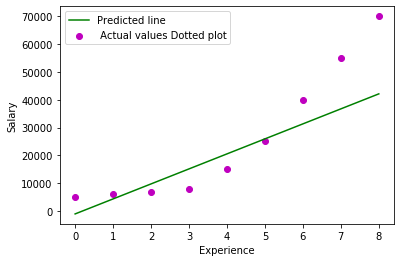

In [72]:
plt.figure()

plt.scatter(df['experience'],df['salary'],c = 'm',label = ' Actual values Dotted plot')
plt.xlabel('Experience')
plt.ylabel('Salary')

plt.plot(df['experience'],model.predict(x),c = 'green',label = "Predicted line")
plt.legend()

plt.show()

##  Polynomial Regression